# Importing important libraries 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

# Suppor vector machine (SVM) importing Algo or model
from sklearn.svm import SVC

# Reading csv file ('Social_Network_Ads.csv')

In [0]:
df = pd.read_csv(r'~/Social_Network_Ads.csv')

In [18]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## checking for any null values in data

In [24]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## describing data

In [25]:
print(df.describe())
print('\n')
print(df.info())


            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
me

In [0]:
encoder = LabelEncoder()
df.Gender = encoder.fit_transform(df.Gender)

In [29]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
322,15674331,1,41,52000,0
252,15795298,0,48,134000,1
263,15767681,0,35,72000,0
324,15575247,0,48,131000,1
309,15652400,0,38,50000,0


In [34]:
# count for zeros in dependent variable
print('count for zeros :' , df.loc[df['Purchased']==0 ,'Purchased'].shape)

# count for ones in dependent variable

print('count for ones :' ,df.loc[df['Purchased'] ==1 , 'Purchased'].shape)

count for zeros : (257,)
count for ones : (143,)


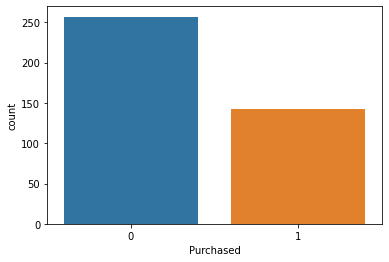

In [35]:
sns.countplot(df.Purchased)

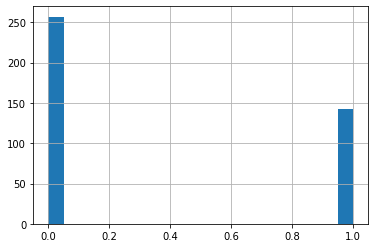

In [38]:
df['Purchased'].hist(bins=20)

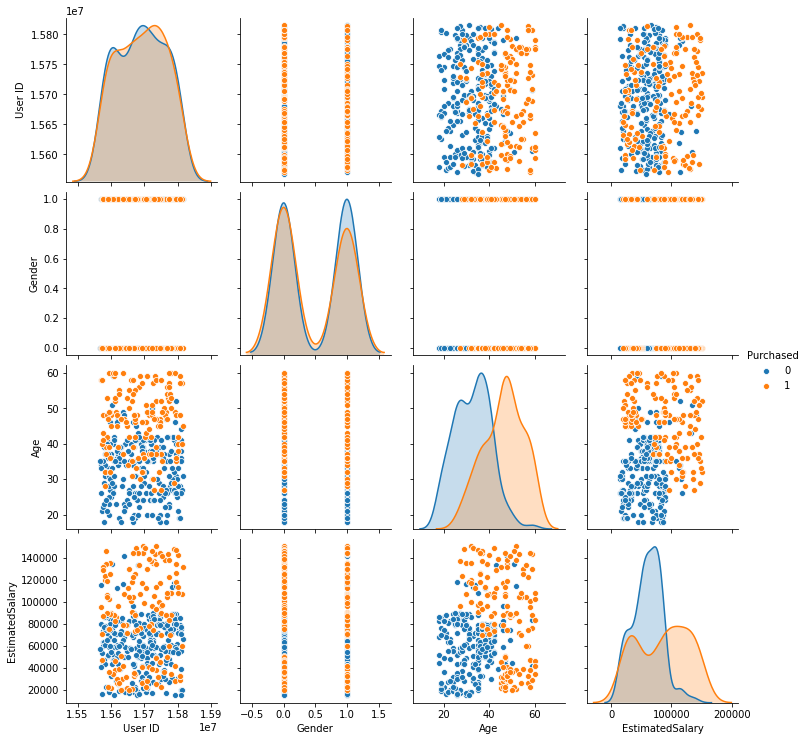

In [41]:
sns.pairplot(df , hue= 'Purchased' )

### dependent and independent data

In [0]:
X = df.iloc[: , 1:4].values
y = df.iloc[:,4].values

### spliting the training and test data

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.2 , random_state= 0)

In [47]:
print('Training data')
print('Features :' , X_train.shape)
print('Labels :',y_train.shape)

print('\nTest data')
print('Features :',X_test.shape)
print('Labels :',y_test.shape)

Training data
Features : (320, 3)
Labels : (320,)

Test data
Features : (80, 3)
Labels : (80,)


### Training SVM model

In [49]:
model = SVC(C=100)
model.fit(X_train ,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
print('Scores')
print('Training' , model.score(X_train , y_train))
print('\nTesting' , model.score(X_test , y_test))

Scores
Training 0.775

Testing 0.825


In [51]:
yp = model.predict(X_test)
yp

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [52]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [54]:
cm = confusion_matrix(y_test , yp)
print('Confusion Matrix : ')
print(cm)

print('\nClassification Report')
print(classification_report(y_test , yp))

Confusion Matrix : 
[[56  2]
 [12 10]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80



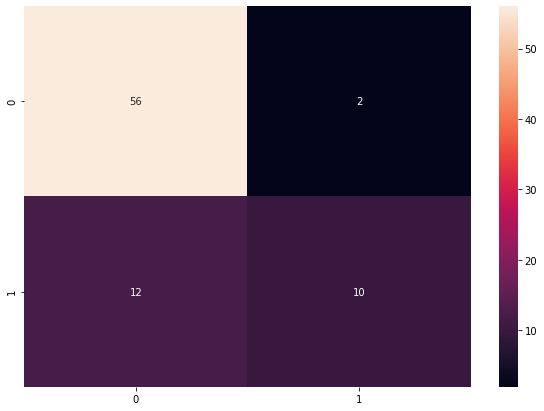

In [57]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.show()